In [1]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import database_credentials as dc

In [2]:
# Database credentials
postgres_user = dc.user()
postgres_pw = dc.pw()
postgres_host = dc.host()
postgres_port = dc.port()
postgres_db = dc.db()

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

# no need for an open connection,
# as we're only doing a single query
engine.dispose()

In [3]:
# creating a table for loadboard activity
# app_version, platform, browser, app_name, heap_app_version
sql = '''
select session_id, user_id, date("time"), library, device_type, carrier
from heap.slb_opened_load_details
WHERE date("time") >= date(current_date - interval '28 days')
AND date("time") < date(current_date)
'''
viewed_load_sessions = pd.read_sql_query(sql, con=engine)
viewed_load_sessions = viewed_load_sessions.rename(columns={'date': 'load_viewed_at', 'user_id': 'heap_user_id'})
viewed_load_sessions

,session_id,heap_user_id,load_viewed_at,library,device_type,carrier
0,4294913935562270,6399625534789261,2020-12-22,web,Mobile,None
1,8032953045027961,6317963538292170,2020-12-22,web,Desktop,None
2,8032953045027961,6317963538292170,2020-12-22,web,Desktop,None
3,8032953045027961,6317963538292170,2020-12-22,web,Desktop,None
4,7996262892566347,4813209314392706,2020-12-22,web,Mobile,None
...,...,...,...,...,...,...
62751,1457224600462085,7342614679095549,2021-01-18,web,Mobile,None
62752,1457224600462085,7342614679095549,2021-01-18,web,Mobile,None
62753,1457224600462085,7342614679095549,2021-01-18,web,Mobile,None
62754,1457224600462085,7342614679095549,2021-01-18,web,Mobile,None


In [4]:
viewed_load_sessions.describe(include='all')

,session_id,heap_user_id,load_viewed_at,library,device_type,carrier
count,6.275600e+04,6.275600e+04,62756,62756,62756,0
unique,NaN,NaN,28,1,3,0
top,NaN,NaN,2021-01-13,web,Mobile,NaN
freq,NaN,NaN,3609,62756,43290,NaN
mean,4.486819e+15,4.347370e+15,NaN,NaN,NaN,NaN
std,2.590668e+15,2.502018e+15,NaN,NaN,NaN,NaN
min,1.794849e+11,2.754904e+12,NaN,NaN,NaN,NaN
25%,2.258520e+15,2.095248e+15,NaN,NaN,NaN,NaN
50%,4.493858e+15,4.320036e+15,NaN,NaN,NaN,NaN
75%,6.717586e+15,6.328984e+15,NaN,NaN,NaN,NaN


In [5]:
# creating a table for heap users
sql = '''
SELECT user_id, "identity", company_id, company_name
FROM heap.users
WHERE role = 'Dispatcher'
'''
heap_users_dispatchers = pd.read_sql_query(sql, con=engine)
heap_users_dispatchers = heap_users_dispatchers.rename(columns={'user_id': 'heap_user_id', 'identity': 'dispatcher_guid',
                                        'company_id': 'carrier_guid'})
heap_users_dispatchers

,heap_user_id,dispatcher_guid,carrier_guid,company_name
0,5770577977256720,bbd24a5c-6dac-4d4b-a748-814bcc5580b1,2454b10b-3ca1-43bc-8727-30457cc5149e,TORNADO AUTO HAULERS INC
1,1395391644577009,dea35d87-3b28-421d-bece-5f8d1be88b09,319ec6e3-1d17-498b-bec6-e8f509ffe404,Dispatch Transport Logic In-TEST
2,7165583539476865,b7deecff-d2b5-4cc1-8a9b-488f3698d102,cea1ad24-f58f-4449-b4a7-3957f5f0f129,Trimika Auto Transport
3,1684890345407840,73b13f11-8d68-4ba1-bb04-ec7148d5a313,f17507f8-9c22-4e86-ab06-6407f189086a,Shore Logistics LLC
4,3178014634371712,f56d0b2b-6786-40da-9ed1-38888123687c,83118c41-063b-4abd-b99a-cd6b8cabcbc3,Titan Transport Solutions LLC
...,...,...,...,...
21212,1710186200184194,1e21b98f-deed-45d7-9a98-e6d600bdd016,None,None
21213,8588002574947043,959fcb79-af5b-4965-98f8-fe292bed4993,None,None
21214,4932027215397874,b3092fbe-8b32-4b60-9732-4ab655b2837c,8b1b21ac-e93b-499b-80ad-af6e19feec8a,ACTS LLC
21215,7114517728771966,b8c9bee5-c961-420a-92f4-f2a97fdd19a5,None,None


In [6]:
# creating a table for heap users
sql = '''
SELECT user_id, "identity", company_id, company_name
FROM heap.users
WHERE role = 'Driver'
'''
heap_users_drivers = pd.read_sql_query(sql, con=engine)
heap_users_drivers = heap_users_drivers.rename(columns={'user_id': 'heap_user_id', 'identity': 'driver_guid',
                                        'company_id': 'carrier_guid'})
heap_users_drivers

,heap_user_id,driver_guid,carrier_guid,company_name
0,6807024858885883,f6bb8ed9-6149-41b2-993b-e92b6af03cf1,9a98d372-5425-4d47-929a-01918932d763,Logitrans llc
1,2572887914923971,fe9235d4-3ddb-4b7f-91ce-b4caf535f535,a776c65a-19e3-424d-a032-d9118dee1c52,PUSKAS TRUCKING INC
2,4080565631628748,d41884bd-3b7e-4f4d-b3f3-f8d055480594,None,None
3,2130327118247784,8343e4df-fd1a-4aff-8cb6-ba0afcb6cfa8,d841a787-cd06-42e2-967b-ab8c67e0b321,MILLENNIUM GROUP INC OF IL
4,5825757294889074,1ed54f0c-b6cd-461b-8e75-4928776de8b1,2addf6fe-f040-43f8-958b-87db96066ae4,SHAROF TRANS INC
...,...,...,...,...
41361,6783672169730419,cfcc95a4-1973-4e15-a288-e8de0296b2cd,None,None
41362,972542984196282,2ada3f5d-c2e6-412a-8e66-7fd0fb3f710e,None,None
41363,206961644502765,738799bd-5d82-441b-a784-8bdceb6cf7c1,None,None
41364,8178085916445636,63cb9909-8d45-4f91-8b5d-5cdc8beae32d,None,None


In [7]:
viewed_load_sessions_2 = viewed_load_sessions.merge(heap_users_dispatchers, left_on='heap_user_id', right_on='heap_user_id')
viewed_load_sessions_2

,session_id,heap_user_id,load_viewed_at,library,device_type,carrier,dispatcher_guid,carrier_guid,company_name
0,8032953045027961,6317963538292170,2020-12-22,web,Desktop,None,ca64acfe-7a84-4c50-8256-a5b394175e89,750eedf6-1725-4173-bbbf-93714c8102eb,Executive Transport LLC
1,8032953045027961,6317963538292170,2020-12-22,web,Desktop,None,ca64acfe-7a84-4c50-8256-a5b394175e89,750eedf6-1725-4173-bbbf-93714c8102eb,Executive Transport LLC
2,8032953045027961,6317963538292170,2020-12-22,web,Desktop,None,ca64acfe-7a84-4c50-8256-a5b394175e89,750eedf6-1725-4173-bbbf-93714c8102eb,Executive Transport LLC
3,4755883039121114,6317963538292170,2020-12-22,web,Desktop,None,ca64acfe-7a84-4c50-8256-a5b394175e89,750eedf6-1725-4173-bbbf-93714c8102eb,Executive Transport LLC
4,7733753777126210,6317963538292170,2020-12-22,web,Desktop,None,ca64acfe-7a84-4c50-8256-a5b394175e89,750eedf6-1725-4173-bbbf-93714c8102eb,Executive Transport LLC
...,...,...,...,...,...,...,...,...,...
20051,1457224600462085,7342614679095549,2021-01-18,web,Mobile,None,4a3208fa-f4d0-46e9-b56d-5402846f785a,None,None
20052,1457224600462085,7342614679095549,2021-01-18,web,Mobile,None,4a3208fa-f4d0-46e9-b56d-5402846f785a,None,None
20053,1457224600462085,7342614679095549,2021-01-18,web,Mobile,None,4a3208fa-f4d0-46e9-b56d-5402846f785a,None,None
20054,1457224600462085,7342614679095549,2021-01-18,web,Mobile,None,4a3208fa-f4d0-46e9-b56d-5402846f785a,None,None


In [8]:
viewed_load_sessions_2.isna().sum()/viewed_load_sessions_2.isna().count()

session_id         0.000000
heap_user_id       0.000000
load_viewed_at     0.000000
library            0.000000
device_type        0.000000
carrier            1.000000
dispatcher_guid    0.000000
carrier_guid       0.017002
company_name       0.017002
dtype: float64

In [9]:
# creating a table for carriers
sql = '''
SELECT name, guid, id
FROM ctms_db_public.msd_carrier
WHERE test_account = False
'''
carriers = pd.read_sql_query(sql, con=engine)
carriers = carriers.rename(columns={'id': 'carrier_id', 'guid': 'carrier_guid', 'name': 'carrier_name'})
carriers

,carrier_name,carrier_guid,carrier_id
0,ayman,71918a40-f1df-4b52-b925-129ed39183f1,7
1,CN2,c623837b-04ee-4cf7-a44c-bca993c4d057,16
2,Transcontinental Express LLC,e835ef60-4200-4863-916a-0eed5bd18f93,25
3,Sifuentes Auto Transport,0a142cbc-cc41-42be-96cc-9bee4dde0929,29
4,A1 USA Express,e97661bf-33fa-4b77-b4b4-23c960e54da8,37
...,...,...,...
40888,AXIS TRANSPORTATION AND LOGISTICS LLC,247627df-ba58-4e8d-8de7-0a1b27324362,39771
40889,TRANSPORTING INVOICE,ee44f70f-3ca3-44a9-98b0-8e2281994b28,1861
40890,Suffy Transport,cdb6346e-1ba1-42a8-a9c3-e7bf2fb9a5d6,20694
40891,ALL AMERICAN RV SERVICES LLC,cccd264d-7453-4fbc-b76f-2074c73d5134,32349


In [10]:
viewed_load_sessions_3 = viewed_load_sessions_2.merge(carriers,
                                        left_on='carrier_guid', right_on='carrier_guid')
viewed_load_sessions_3

,session_id,heap_user_id,load_viewed_at,library,device_type,carrier,dispatcher_guid,carrier_guid,company_name,carrier_name,carrier_id
0,8032953045027961,6317963538292170,2020-12-22,web,Desktop,None,ca64acfe-7a84-4c50-8256-a5b394175e89,750eedf6-1725-4173-bbbf-93714c8102eb,Executive Transport LLC,Executive Transport LLC,14751
1,8032953045027961,6317963538292170,2020-12-22,web,Desktop,None,ca64acfe-7a84-4c50-8256-a5b394175e89,750eedf6-1725-4173-bbbf-93714c8102eb,Executive Transport LLC,Executive Transport LLC,14751
2,8032953045027961,6317963538292170,2020-12-22,web,Desktop,None,ca64acfe-7a84-4c50-8256-a5b394175e89,750eedf6-1725-4173-bbbf-93714c8102eb,Executive Transport LLC,Executive Transport LLC,14751
3,4755883039121114,6317963538292170,2020-12-22,web,Desktop,None,ca64acfe-7a84-4c50-8256-a5b394175e89,750eedf6-1725-4173-bbbf-93714c8102eb,Executive Transport LLC,Executive Transport LLC,14751
4,7733753777126210,6317963538292170,2020-12-22,web,Desktop,None,ca64acfe-7a84-4c50-8256-a5b394175e89,750eedf6-1725-4173-bbbf-93714c8102eb,Executive Transport LLC,Executive Transport LLC,14751
...,...,...,...,...,...,...,...,...,...,...,...
19418,7465278579715322,1568739578032587,2021-01-17,web,Mobile,None,305743f6-cea2-45ce-8fe6-605977238b39,a5df8342-1981-4d20-8c8f-474494519615,ROYAL MOTOR LINES INC,ROYAL MOTOR LINES INC,21640
19419,7465278579715322,1568739578032587,2021-01-17,web,Mobile,None,305743f6-cea2-45ce-8fe6-605977238b39,a5df8342-1981-4d20-8c8f-474494519615,ROYAL MOTOR LINES INC,ROYAL MOTOR LINES INC,21640
19420,8663233386029478,5925236574418249,2021-01-17,web,Desktop,None,f23cf26b-7abc-4784-8195-899b56d2e985,117e9c4b-4178-4899-a754-c23e5d5dacf7,IVGV LLC,IVGV LLC,44406
19421,8690325492809947,7811414316425047,2021-01-16,web,Desktop,None,30183faa-0326-46a3-aa86-f51d3d0a8644,74d83e11-3d90-4649-b045-66cc0536aab6,GOOD GREEK MOVING AND STORAGE,GOOD GREEK MOVING AND STORAGE,44418


In [11]:
result = viewed_load_sessions_3.groupby(['carrier_guid', 'carrier_id']).nunique()[['load_viewed_at']]
result.reset_index(inplace=True)
result = result.rename(columns={'load_viewed_at': 'unique_days_viewed_load_details'})
result

,carrier_guid,carrier_id,unique_days_viewed_load_details
0,0029175c-e577-4733-add3-4dce7462e7a4,24669,1
1,00533bf5-6a07-4a9b-a56e-d7bcec9375d1,17637,2
2,005ac507-176d-4806-888e-c23ea5df80b9,40497,17
3,009b1809-d6f8-42c9-a45a-84bd18012951,40996,2
4,00bf92bb-7066-4ae0-8709-e2b292298f67,34878,2
...,...,...,...
1089,fea8ac1c-79a3-4a70-9ffe-ca95e3407cee,2378,6
1090,fea998fd-5daa-4005-ac22-40c51066a178,28479,1
1091,fee4d941-0470-48d6-b03b-233cac41a980,44282,1
1092,ff02019c-d2bb-4833-ade1-a5239f25f2f2,11874,1


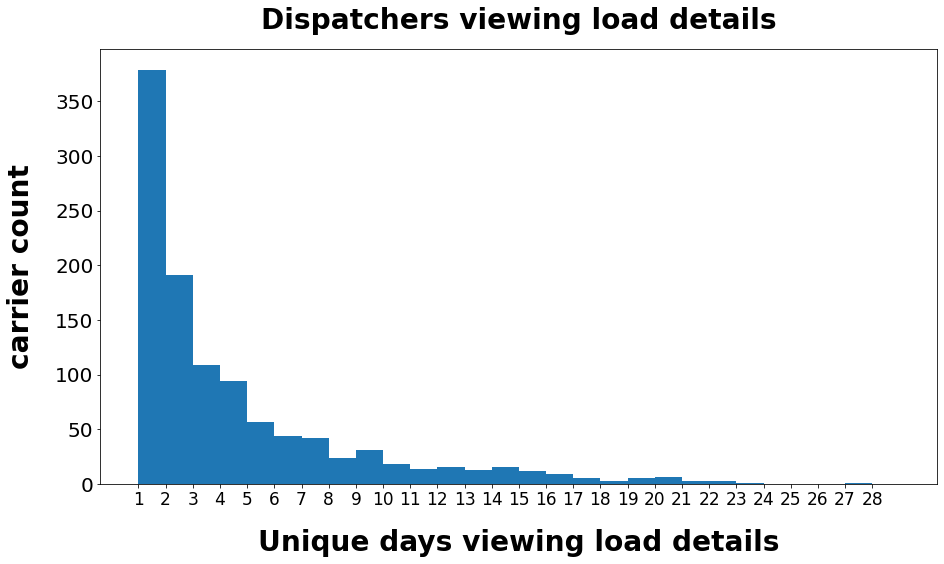

In [12]:
# histogram of unique accepted offers in last 28 days (all carriers)
plt.figure(figsize=(15,8))
plt.hist(result['unique_days_viewed_load_details'], bins=np.arange(1, 30))
plt.xticks(np.arange(1, 29), fontsize=17)
plt.yticks(fontsize=20)
plt.xlabel('Unique days viewing load details', fontsize=28, fontweight='bold', labelpad=20)
plt.ylabel('carrier count', fontsize=28, fontweight='bold', labelpad=20)
plt.title('Dispatchers viewing load details', fontsize=28, fontweight='bold', pad=20)
plt.show()

# Now let's segment paid users and free users

In [13]:
# creating a table for braintree subscriptions
sql = '''
DROP TABLE IF EXISTS #carrier_with_latest_sub_date
;
SELECT 
carrier_id
,max(created_at) AS last_sub
INTO #carrier_with_latest_sub_date
FROM ctms_db_public.billing_braintreesubscription
WHERE braintree_subscription_status IN ('Active', 'Past Due', 'Pending')
GROUP BY carrier_id
;
SELECT 
#carrier_with_latest_sub_date.carrier_id
,last_sub
,braintree_subscription_status
FROM #carrier_with_latest_sub_date
JOIN ctms_db_public.billing_braintreesubscription
ON #carrier_with_latest_sub_date.carrier_id = billing_braintreesubscription.carrier_id
AND #carrier_with_latest_sub_date.last_sub = billing_braintreesubscription.created_at
WHERE billing_braintreesubscription.braintree_subscription_status IN ('Active', 'Past Due', 'Pending')
;
'''
braintree_subs = pd.read_sql_query(sql, con=engine)
braintree_subs

,carrier_id,last_sub,braintree_subscription_status
0,5466,2016-11-26 09:21:35.868856,Active
1,3298,2016-11-26 09:21:30.983747,Active
2,4925,2017-01-20 15:19:46.097090,Active
3,1421,2017-05-18 13:42:02.182933,Active
4,433,2017-06-19 19:32:44.584252,Active
...,...,...,...
2865,14072,2021-01-18 19:13:08.675679,Active
2866,4554,2021-01-18 19:44:05.227397,Active
2867,40497,2021-01-18 23:06:56.706775,Active
2868,41621,2021-01-18 23:49:41.427665,Active


In [14]:
# joining carriers with braintree table

braintree_with_carriers = braintree_subs.merge(carriers, left_on='carrier_id', right_on='carrier_id')
braintree_with_carriers

,carrier_id,last_sub,braintree_subscription_status,carrier_name,carrier_guid
0,5466,2016-11-26 09:21:35.868856,Active,Rob's Auto Transport LLC,101ce8ba-b529-43c1-80bf-c0f6939ba2a3
1,3298,2016-11-26 09:21:30.983747,Active,Rhoades Logistics LLC,7196d66a-cd25-4ae4-bcdb-15f01b895c2e
2,4925,2017-01-20 15:19:46.097090,Active,Double Time Transport,533c4db9-1f0e-4da2-83e1-ed1385508496
3,1421,2017-05-18 13:42:02.182933,Active,"L&N Transport, LLC",4ba23995-f6ad-4efa-86f8-e3d14d4d9e32
4,433,2017-06-19 19:32:44.584252,Active,FRANK MESSINA,525f3fe2-61bf-452b-b5dd-2ff269a05231
...,...,...,...,...,...
2865,14072,2021-01-18 19:13:08.675679,Active,ABA Logistics,9802165b-65e2-4d34-a9e7-1f9d3001a841
2866,4554,2021-01-18 19:44:05.227397,Active,DB TRANSPORT LLC,f3c31466-8ad6-4624-b14c-035e943b1012
2867,40497,2021-01-18 23:06:56.706775,Active,JGRAM TRANSPORTATION LLC,005ac507-176d-4806-888e-c23ea5df80b9
2868,41621,2021-01-18 23:49:41.427665,Active,PH AUTO TRANSPORT LLC,126dea7c-d499-4a51-b014-a013e21c0231


# Paid users

In [15]:
result_paid_users = result.merge(braintree_with_carriers, left_on=['carrier_id', 'carrier_guid'],
                                                                   right_on=['carrier_id', 'carrier_guid'])
result_paid_users = result_paid_users[['carrier_guid', 'carrier_id', 'unique_days_viewed_load_details']]
result_paid_users

,carrier_guid,carrier_id,unique_days_viewed_load_details
0,0029175c-e577-4733-add3-4dce7462e7a4,24669,1
1,005ac507-176d-4806-888e-c23ea5df80b9,40497,17
2,009b1809-d6f8-42c9-a45a-84bd18012951,40996,2
3,0146e319-5718-4c12-9bd1-709247ecaab0,36810,9
4,01f4bc96-a279-4b0f-be5e-0e525b486571,17480,2
...,...,...,...
653,fe2a21e3-767c-4a63-983a-777654cb57dd,38395,1
654,fe6857c1-bf43-4a98-9f0a-b2a3e25bf214,30704,11
655,fea8ac1c-79a3-4a70-9ffe-ca95e3407cee,2378,6
656,fea998fd-5daa-4005-ac22-40c51066a178,28479,1


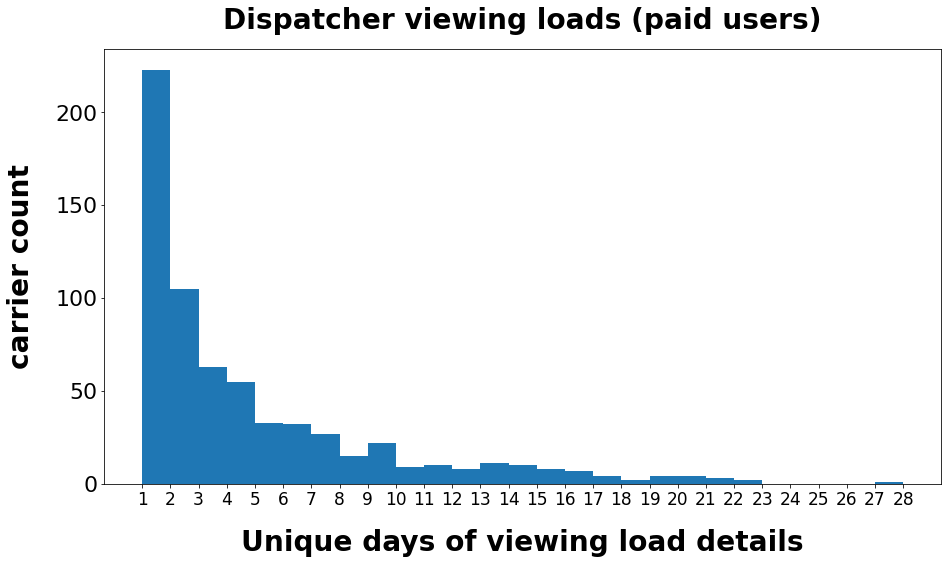

In [16]:
# histogram of unique days of driver activity (changing load status)
plt.figure(figsize=(15,8))
plt.hist(result_paid_users['unique_days_viewed_load_details'], bins=np.arange(1, 29))
plt.xticks(np.arange(1, 29), fontsize=17)
plt.yticks(fontsize=22)
plt.xlabel('Unique days of viewing load details', fontsize=28, fontweight='bold', labelpad=20)
plt.ylabel('carrier count', fontsize=28, fontweight='bold', labelpad=20)
plt.title('Dispatcher viewing loads (paid users)', fontsize=28, fontweight='bold', pad=20)
plt.show()

# Free users

In [17]:
result_free_users = result.merge(braintree_with_carriers, how='left', left_on=['carrier_id', 'carrier_guid'],
                                                                   right_on=['carrier_id', 'carrier_guid'])

non_payers = result_free_users['braintree_subscription_status'].isna() == True
result_free_users = result_free_users[non_payers]
result_free_users = result_free_users[['carrier_guid', 'carrier_id', 'unique_days_viewed_load_details']]
result_free_users

,carrier_guid,carrier_id,unique_days_viewed_load_details
1,00533bf5-6a07-4a9b-a56e-d7bcec9375d1,17637,2
4,00bf92bb-7066-4ae0-8709-e2b292298f67,34878,2
14,03c0ae25-bc43-4c0d-a02d-34f89a36a931,33720,3
15,03f32a1e-e5b2-4873-80e2-80a3fb60da49,43428,8
16,044087b3-e1c1-470d-9a80-6501a5a255ad,25091,2
...,...,...,...
1081,fd01a55c-8fd6-4f9e-afa9-1fd5bd804017,43849,3
1084,fdaaabdf-5b0e-4367-94e5-3ab7447e535c,25366,1
1086,fe1298ef-eb41-4557-a1ef-b266e557ac84,25023,1
1091,fee4d941-0470-48d6-b03b-233cac41a980,44282,1


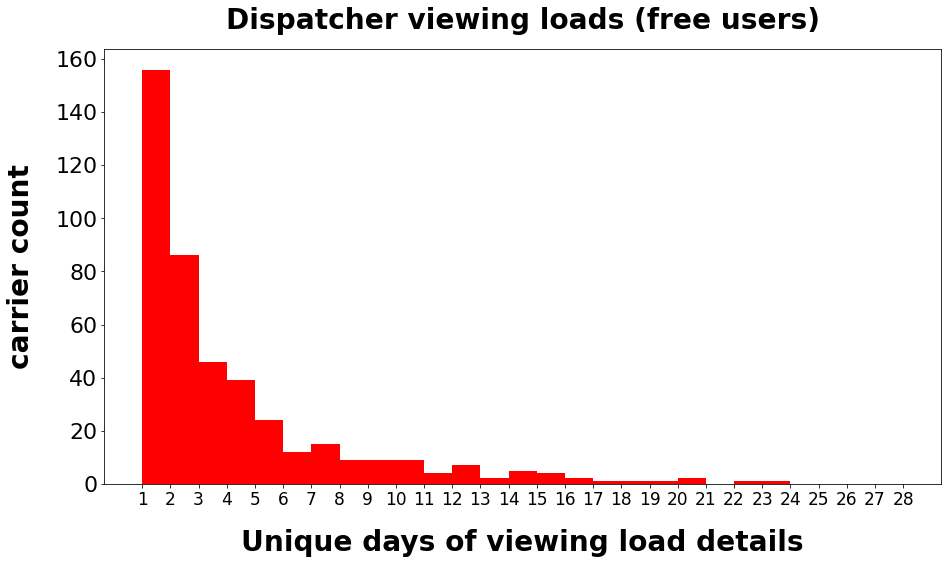

In [18]:
# histogram of unique days of driver activity (changing load status)
plt.figure(figsize=(15,8))
plt.hist(result_free_users['unique_days_viewed_load_details'], bins=np.arange(1, 29), color='red')
plt.xticks(np.arange(1, 29), fontsize=17)
plt.yticks(fontsize=22)
plt.xlabel('Unique days of viewing load details', fontsize=28, fontweight='bold', labelpad=20)
plt.ylabel('carrier count', fontsize=28, fontweight='bold', labelpad=20)
plt.title('Dispatcher viewing loads (free users)', fontsize=28, fontweight='bold', pad=20)
plt.show()

In [19]:
total_paid_carriers_for_days_active = []

for i in range(1,29):
    paid_active_carrier_count = (result_paid_users[result_paid_users['unique_days_viewed_load_details'] >= i]
                           .groupby('unique_days_viewed_load_details').count()['carrier_guid'].sum())
    
    total_paid_carriers_for_days_active.append(paid_active_carrier_count)
    


total_free_carriers_for_days_active = []

for i in range(1,29):
    free_active_carrier_count = (result_free_users[result_free_users['unique_days_viewed_load_details'] >= i]
                           .groupby('unique_days_viewed_load_details').count()['carrier_guid'].sum())
    
    total_free_carriers_for_days_active.append(free_active_carrier_count)

In [20]:
all_paid_carriers = braintree_with_carriers
all_paid_carriers

,carrier_id,last_sub,braintree_subscription_status,carrier_name,carrier_guid
0,5466,2016-11-26 09:21:35.868856,Active,Rob's Auto Transport LLC,101ce8ba-b529-43c1-80bf-c0f6939ba2a3
1,3298,2016-11-26 09:21:30.983747,Active,Rhoades Logistics LLC,7196d66a-cd25-4ae4-bcdb-15f01b895c2e
2,4925,2017-01-20 15:19:46.097090,Active,Double Time Transport,533c4db9-1f0e-4da2-83e1-ed1385508496
3,1421,2017-05-18 13:42:02.182933,Active,"L&N Transport, LLC",4ba23995-f6ad-4efa-86f8-e3d14d4d9e32
4,433,2017-06-19 19:32:44.584252,Active,FRANK MESSINA,525f3fe2-61bf-452b-b5dd-2ff269a05231
...,...,...,...,...,...
2865,14072,2021-01-18 19:13:08.675679,Active,ABA Logistics,9802165b-65e2-4d34-a9e7-1f9d3001a841
2866,4554,2021-01-18 19:44:05.227397,Active,DB TRANSPORT LLC,f3c31466-8ad6-4624-b14c-035e943b1012
2867,40497,2021-01-18 23:06:56.706775,Active,JGRAM TRANSPORTATION LLC,005ac507-176d-4806-888e-c23ea5df80b9
2868,41621,2021-01-18 23:49:41.427665,Active,PH AUTO TRANSPORT LLC,126dea7c-d499-4a51-b014-a013e21c0231


In [21]:
all_free_carriers =  carriers.merge(braintree_with_carriers, how='left',
                                        left_on='carrier_guid', right_on='carrier_guid')

# getting all free users
non_payers = all_free_carriers['braintree_subscription_status'].isna() == True
# #dropping all rows with paid users
all_free_carriers = all_free_carriers[non_payers]
all_free_carriers

,carrier_name_x,carrier_guid,carrier_id_x,carrier_id_y,last_sub,braintree_subscription_status,carrier_name_y
0,ayman,71918a40-f1df-4b52-b925-129ed39183f1,7,NaN,NaT,NaN,NaN
1,CN2,c623837b-04ee-4cf7-a44c-bca993c4d057,16,NaN,NaT,NaN,NaN
2,Transcontinental Express LLC,e835ef60-4200-4863-916a-0eed5bd18f93,25,NaN,NaT,NaN,NaN
3,Sifuentes Auto Transport,0a142cbc-cc41-42be-96cc-9bee4dde0929,29,NaN,NaT,NaN,NaN
4,A1 USA Express,e97661bf-33fa-4b77-b4b4-23c960e54da8,37,NaN,NaT,NaN,NaN
...,...,...,...,...,...,...,...
40881,Vip Auto Trans Inc,1e03a89b-27e6-4504-ad18-46aab277840d,18659,NaN,NaT,NaN,NaN
40883,TURBO TRANSPORTATION GROUP LLC,00442282-674b-4597-95be-3456e9ed54f1,43636,NaN,NaT,NaN,NaN
40887,ACTION TRANSPORT SERVICE LLC,427a843f-083d-45be-9c57-04cdcad14ce8,26082,NaN,NaT,NaN,NaN
40889,TRANSPORTING INVOICE,ee44f70f-3ca3-44a9-98b0-8e2281994b28,1861,NaN,NaT,NaN,NaN


In [22]:
paid_active_carriers = pd.DataFrame()
paid_active_carriers['definition_is_this_many_days_active'] = np.arange(1,29)
paid_active_carriers.set_index('definition_is_this_many_days_active', inplace=True)
paid_active_carriers['total_carriers_at_least_this_active'] = total_paid_carriers_for_days_active
paid_active_carriers['total_dormant_carriers'] = ([len(all_paid_carriers) - total_paid_carriers_for_days_active[x]
                                                 for x in range(len(total_paid_carriers_for_days_active))]) 
paid_active_carriers['total_percentage_active'] = round(100*paid_active_carriers['total_carriers_at_least_this_active']
                                                      /len(all_paid_carriers))
paid_active_carriers['total_percentage_dormant'] = 100 - paid_active_carriers['total_percentage_active']


free_active_carriers = pd.DataFrame()
free_active_carriers['definition_is_this_many_days_active'] = np.arange(1,29)
free_active_carriers.set_index('definition_is_this_many_days_active', inplace=True)
free_active_carriers['total_carriers_at_least_this_active'] = total_free_carriers_for_days_active
free_active_carriers['total_dormant_carriers'] = ([len(all_free_carriers) - total_free_carriers_for_days_active[x]
                                                 for x in range(len(total_free_carriers_for_days_active))])
free_active_carriers['total_percentage_active'] = round(100*free_active_carriers['total_carriers_at_least_this_active']
                                                      /len(all_free_carriers))
free_active_carriers['total_percentage_dormant'] = 100 - free_active_carriers['total_percentage_active']

In [23]:
def all_users(paid_metric_definition, free_metric_definition):
    plt.figure(figsize=(13,11))
    plt.subplots_adjust(wspace=.9)
    
    plt.subplot(1,2,1)
    paid_graph = sns.barplot(x=['active', 'dormant'],
                        y=[paid_active_carriers.loc[paid_metric_definition, 'total_carriers_at_least_this_active'],
                           paid_active_carriers.loc[paid_metric_definition, 'total_dormant_carriers']],
                        palette='muted')
    for p in paid_graph.patches:
        paid_graph.annotate(p.get_height(), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, -20), 
                       textcoords = 'offset points',
                       fontsize=20)
        paid_graph.annotate('{}%'.format(round(100*p.get_height()/len(all_paid_carriers))), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 15), 
                       textcoords = 'offset points',
                       fontsize=20)
    plt.xticks(fontsize=18, fontweight='bold')
    plt.yticks(fontsize=18)
    plt.ylabel('Carrier Count', fontsize=28, fontweight='bold', labelpad=20)
    title = '''If {} out of 28 days
viewing load details
(paid users)'''.format(paid_metric_definition)
    plt.title(title, fontsize=28, fontweight='bold', pad=20)

        
    
    plt.subplot(1,2,2)
    non_paid_graph = sns.barplot(x=['active', 'dormant'],
                        y=[free_active_carriers.loc[free_metric_definition, 'total_carriers_at_least_this_active'], 
                           free_active_carriers.loc[free_metric_definition, 'total_dormant_carriers']],
                        palette='muted')
    for p in non_paid_graph.patches:
        non_paid_graph.annotate(p.get_height(), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, -20), 
                       textcoords = 'offset points',
                       fontsize=20)
        non_paid_graph.annotate('{}%'.format(round(100*p.get_height()/len(all_free_carriers))), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 15), 
                       textcoords = 'offset points',
                       fontsize=20)
    plt.xticks(fontsize=18, fontweight='bold')
    plt.yticks(fontsize=18)
    title = '''If {} out of 28 days
viewing load details
(free users)'''.format(free_metric_definition)
    plt.title(title, fontsize=28, fontweight='bold', pad=20)
    plt.show()

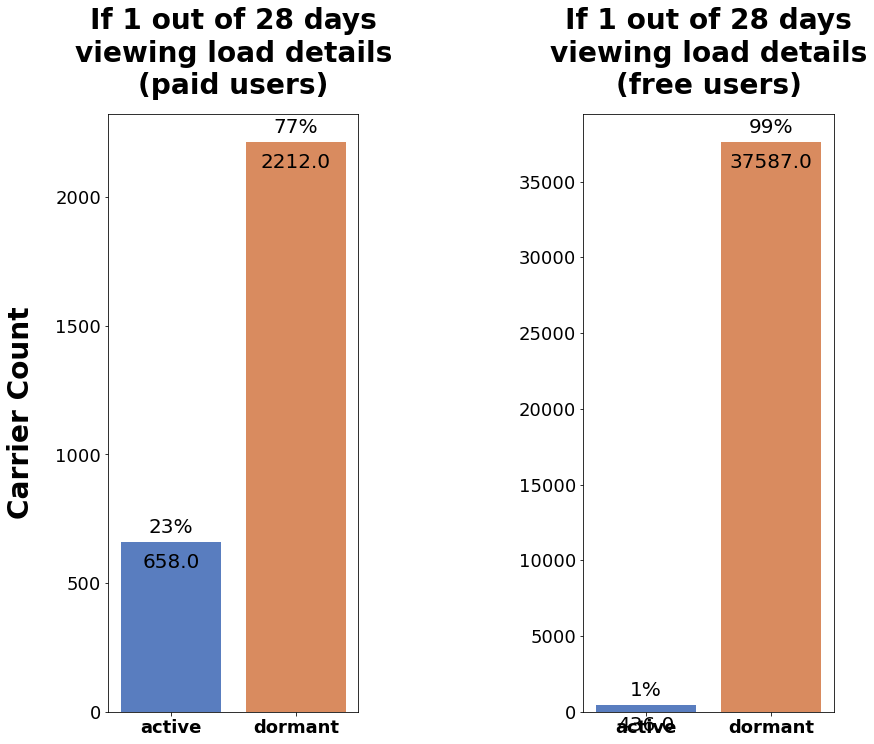

In [24]:
all_users(1,1)